In [1]:
import numpy as np
import os
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
learning_map_kitti={
  0 : 0,     # "unlabeled"
  1 : 0,     # "outlier" mapped to "unlabeled" --------------------------mapped
  10: 1,     # "car"
  11: 2,     # "bicycle"
  13: 5,     # "bus" mapped to "other-vehicle" --------------------------mapped
  15: 3,     # "motorcycle"
  16: 5,     # "on-rails" mapped to "other-vehicle" ---------------------mapped
  18: 4,     # "truck"
  20: 5,     # "other-vehicle"
  30: 6,     # "person"
  31: 7,     # "bicyclist"
  32: 8,     # "motorcyclist"
  40: 9,     # "road"
  44: 10,    # "parking"
  48: 11,    # "sidewalk"
  49: 12,    # "other-ground"
  50: 13,    # "building"
  51: 14,    # "fence"
  52: 0,     # "other-structure" mapped to "unlabeled" ------------------mapped
  60: 9,     # "lane-marking" to "road" ---------------------------------mapped
  70: 15,    # "vegetation"
  71: 16,    # "trunk"
  72: 17,    # "terrain"
  80: 18,    # "pole"
  81: 19,    # "traffic-sign"
  99: 0,     # "other-object" to "unlabeled" ----------------------------mapped
  252: 1,    # "moving-car" to "car" ------------------------------------mapped
  253: 7,    # "moving-bicyclist" to "bicyclist" ------------------------mapped
  254: 6,    # "moving-person" to "person" ------------------------------mapped
  255: 8,    # "moving-motorcyclist" to "motorcyclist" ------------------mapped
  256: 5,    # "moving-on-rails" mapped to "other-vehicle" --------------mapped
  257: 5,    # "moving-bus" mapped to "other-vehicle" -------------------mapped
  258: 4,    # "moving-truck" to "truck" --------------------------------mapped
  259: 5,    # "moving-other"-vehicle to "other-vehicle" ----------------mapped
}

learning_map_nusc = {
  1: 0,
  5: 0,
  7: 0,
  8: 0,
  10: 0,
  11: 0,
  13: 0,
  19: 0,
  20: 0,
  0: 0,
  29: 0,
  31: 0,
  9: 1,
  14: 2,
  15: 3,
  16: 3,
  17: 4,
  18: 5,
  21: 6,
  2: 7,
  3: 7,
  4: 7,
  6: 7,
  12: 8,
  22: 9,
  23: 10,
  24: 11,
  25: 12,
  26: 13,
  27: 14,
  28: 15,
  30: 16
}

labels = { 
  0: 'noise',
  1: 'animal',
  2: 'human.pedestrian.adult',
  3: 'human.pedestrian.child',
  4: 'human.pedestrian.construction_worker',
  5: 'human.pedestrian.personal_mobility',
  6: 'human.pedestrian.police_officer',
  7: 'human.pedestrian.stroller',
  8: 'human.pedestrian.wheelchair',
  9: 'movable_object.barrier',
  10: 'movable_object.debris',
  11: 'movable_object.pushable_pullable',
  12: 'movable_object.trafficcone',
  13: 'static_object.bicycle_rack',
  14: 'vehicle.bicycle',
  15: 'vehicle.bus.bendy',
  16: 'vehicle.bus.rigid',
  17: 'vehicle.car',
  18: 'vehicle.construction',
  19: 'vehicle.emergency.ambulance',
  20: 'vehicle.emergency.police',
  21: 'vehicle.motorcycle',
  22: 'vehicle.trailer',
  23: 'vehicle.truck',
  24: 'flat.driveable_surface',
  25: 'flat.other',
  26: 'flat.sidewalk',
  27: 'flat.terrain',
  28: 'static.manmade',
  29: 'static.other',
  30: 'static.vegetation',
  31: 'vehicle.ego',
}

labels_16 = {
  0: 'noise',
  1: 'barrier',
  2: 'bicycle',
  3: 'bus',
  4: 'car',
  5: 'construction_vehicle',
  6: 'motorcycle',
  7: 'pedestrian',
  8: 'traffic_cone',
  9: 'trailer',
  10: 'truck',
  11: 'driveable_surface',
  12: 'other_flat',
  13: 'sidewalk',
  14: 'terrain',
  15: 'manmade',
  16: 'vegetation'
  }
  
learning_map = {
  1: 0,
  5: 0,
  7: 0,
  8: 0,
  10: 0,
  11: 0,
  13: 0,
  19: 0,
  20: 0,
  0: 0,
  29: 0,
  31: 0,
  9: 1,
  14: 2,
  15: 3,
  16: 3,
  17: 4,
  18: 5,
  21: 6,
  2: 7,
  3: 7,
  4: 7,
  6: 7,
  12: 8,
  22: 9,
  23: 10,
  24: 11,
  25: 12,
  26: 13,
  27: 14,
  28: 15,
  30: 16
  }

In [5]:
d = {value: [] for value in labels_16.values()}
for key, value in learning_map.items():
    d[labels_16[value]].append(labels[key])

for k in d:
    print(f'{k}: {", ".join(d[k])}')

noise: animal, human.pedestrian.personal_mobility, human.pedestrian.stroller, human.pedestrian.wheelchair, movable_object.debris, movable_object.pushable_pullable, static_object.bicycle_rack, vehicle.emergency.ambulance, vehicle.emergency.police, noise, static.other, vehicle.ego
barrier: movable_object.barrier
bicycle: vehicle.bicycle
bus: vehicle.bus.bendy, vehicle.bus.rigid
car: vehicle.car
construction_vehicle: vehicle.construction
motorcycle: vehicle.motorcycle
pedestrian: human.pedestrian.adult, human.pedestrian.child, human.pedestrian.construction_worker, human.pedestrian.police_officer
traffic_cone: movable_object.trafficcone
trailer: vehicle.trailer
truck: vehicle.truck
driveable_surface: flat.driveable_surface
other_flat: flat.other
sidewalk: flat.sidewalk
terrain: flat.terrain
manmade: static.manmade
vegetation: static.vegetation


In [3]:
class_names_kitti = ['car', 'bicycle', 'motorcycle', 'truck', 'other-vehicle', 'person',
                     'bicyclist', 'motorcyclist', 'road', 'parking', 'sidewalk', 'other-ground',
                     'building', 'fence', 'vegetation', 'trunk', 'terrain', 'pole', 'traffic-sign']

class_names_nusc = [
 'barrier',
 'bicycle',
 'bus',
 'car',
 'construction_vehicle',
 'motorcycle',
 'pedestrian',
 'traffic_cone',
 'trailer',
 'truck',
 'driveable_surface',
 'other_flat',
 'sidewalk',
 'terrain',
 'manmade',
 'vegetation']

In [111]:
num_classes = {'kitti': 20,
               'nusc': 17}

# Load predictions and ground truth
def load_pred_gt(dir_name_pred, dir_name_gt, learning_map, type='kitti'):
    nclasses = num_classes[type]
    data = np.zeros((nclasses, nclasses), dtype=np.uint64)
    lengt = 0
    lenpred = 0

    for i, path in enumerate(os.listdir(dir_name_pred)):
        # Load pred
        pred_path = os.path.join(dir_name_pred, path)
        
        # Load gt
        gt_path = os.path.join(dir_name_gt, path)
        if type == 'kitti':
            pred = np.fromfile(pred_path, dtype=np.uint32).reshape(-1)
            gt = np.fromfile(gt_path, np.uint32).reshape(-1)
            gt = gt & 0xFFFF
            gt = (np.vectorize(learning_map.__getitem__)(gt)).astype(np.uint64)
        else:
            pred = np.fromfile(pred_path, dtype=np.uint8).reshape(-1)
            gt = np.fromfile(gt_path, dtype=np.uint8).reshape(-1)
            gt = np.vectorize(learning_map.__getitem__)(gt).astype(np.float32)
        
        gt, pred = gt.astype(np.uint64), pred.astype(np.uint64)
      

        # Count length
        lengt += len(gt)
        lenpred += len(pred)


        for k in range(1, nclasses):
            indices = np.where(gt == k)
            class_at_indices = pred[indices]
            
            for j in range(1, nclasses):
                count = np.count_nonzero(class_at_indices == j)
                data[k][j] = data[k][j] + count

    return data[1:, 1:], gt, pred, lengt, lenpred


def plot_confusion_matrix(array, class_names, filename):
    df_cm = pd.DataFrame(array, index = class_names, columns = class_names)
    plt.figure(figsize = (20,17))
    #sn.set(font_scale=0.8)
    s = sn.heatmap(df_cm, annot=True, cmap=sn.cm.rocket_r, fmt='.2f', annot_kws={'size': 16, 'weight': 'bold'})
    # s.set_xlabel('Predictions', fontsize=14, fontweight='bold')
    # s.set_ylabel('Ground Truth', fontsize=14, fontweight='bold')
    # s.ax_heatmap.set_xticklabels(s.ax_heatmap.get_xmajorticklabels(), fontsize = 16)
    cbar = s.collections[0].colorbar
    # here set the labelsize by 20
    cbar.ax.tick_params(labelsize=16)

    plt.xticks(rotation=35)
    plt.yticks(rotation=0)
    for label in s.get_yticklabels():
        #if label.get_text() == "February":
        label.set_size(14)
        label.set_weight("bold")
        #label.set_color("red")

    for label in s.get_xticklabels():
        #if label.get_text() == "February":
        label.set_size(14)
        label.set_weight("bold")
        #label.set_color("red")

    plt.savefig(f'{filename}.png')
    plt.savefig(f'{filename}.pdf')

### Confusion matrix SemanticKITTI validation set

In [5]:
pred_kitti_dir = 'D:\In_School_Document\Fourth_Year\Thesis\FINAL\OUPUT\out_val_kitti_range_origin_48\out\sequences\\08\predictions'
gt_kitti_dir = 'D:\In_School_Document\Fourth_Year\Thesis\FINAL\OUPUT\out_val_kitti_range_origin_48\labels'

data, gt, pred, lengt, lenpred = load_pred_gt(pred_kitti_dir, gt_kitti_dir, learning_map_kitti, 'kitti')

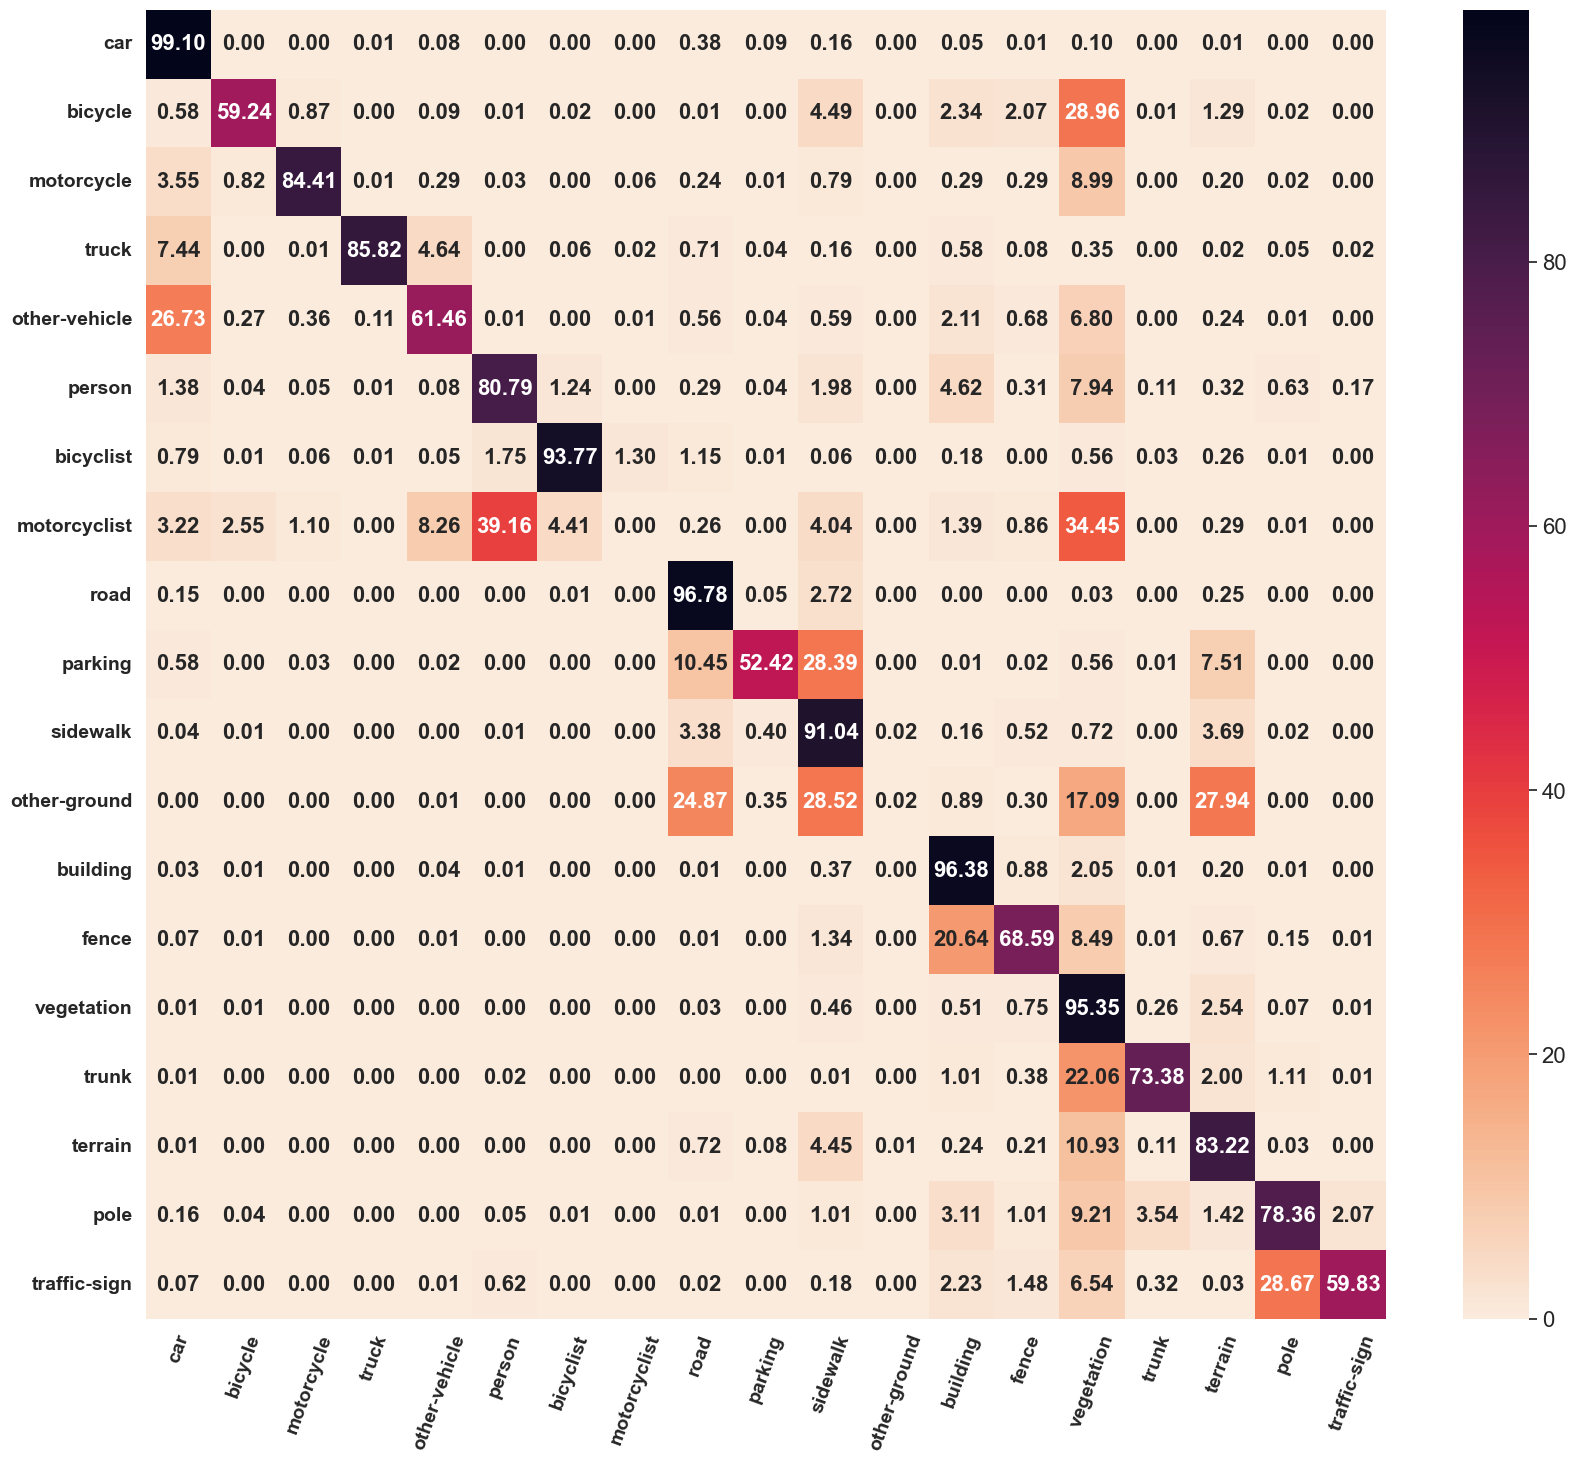

In [101]:
array = (data / data.sum(axis=1).reshape((19, 1))) * 100
plot_confusion_matrix(array, class_names_kitti, 'cm_kitti_val')

### Confusion matrix nuScenes validation set

In [103]:
gt_nusc_dir = 'D:\In_School_Document\Fourth_Year\Thesis\FINAL\OUPUT\\nusc_50_range_hrnet48\gt_and_pred_val_nusc\\results_folder\\results_folder\lidarseg\gt'
pred_nusc_dir = 'D:\In_School_Document\Fourth_Year\Thesis\FINAL\OUPUT\\nusc_50_range_hrnet48\gt_and_pred_val_nusc\\results_folder\\results_folder\lidarseg\\test'

data_nusc, gt_nusc, pred_nusc, lengt_nusc, lenpred_nusc = load_pred_gt(pred_nusc_dir, gt_nusc_dir, learning_map_nusc, 'nusc')

In [86]:
gt.max(), gt.min(), pred.max(), pred.min(), len(gt), len(pred)

(16, 0, 16, 1, 34688, 34688)

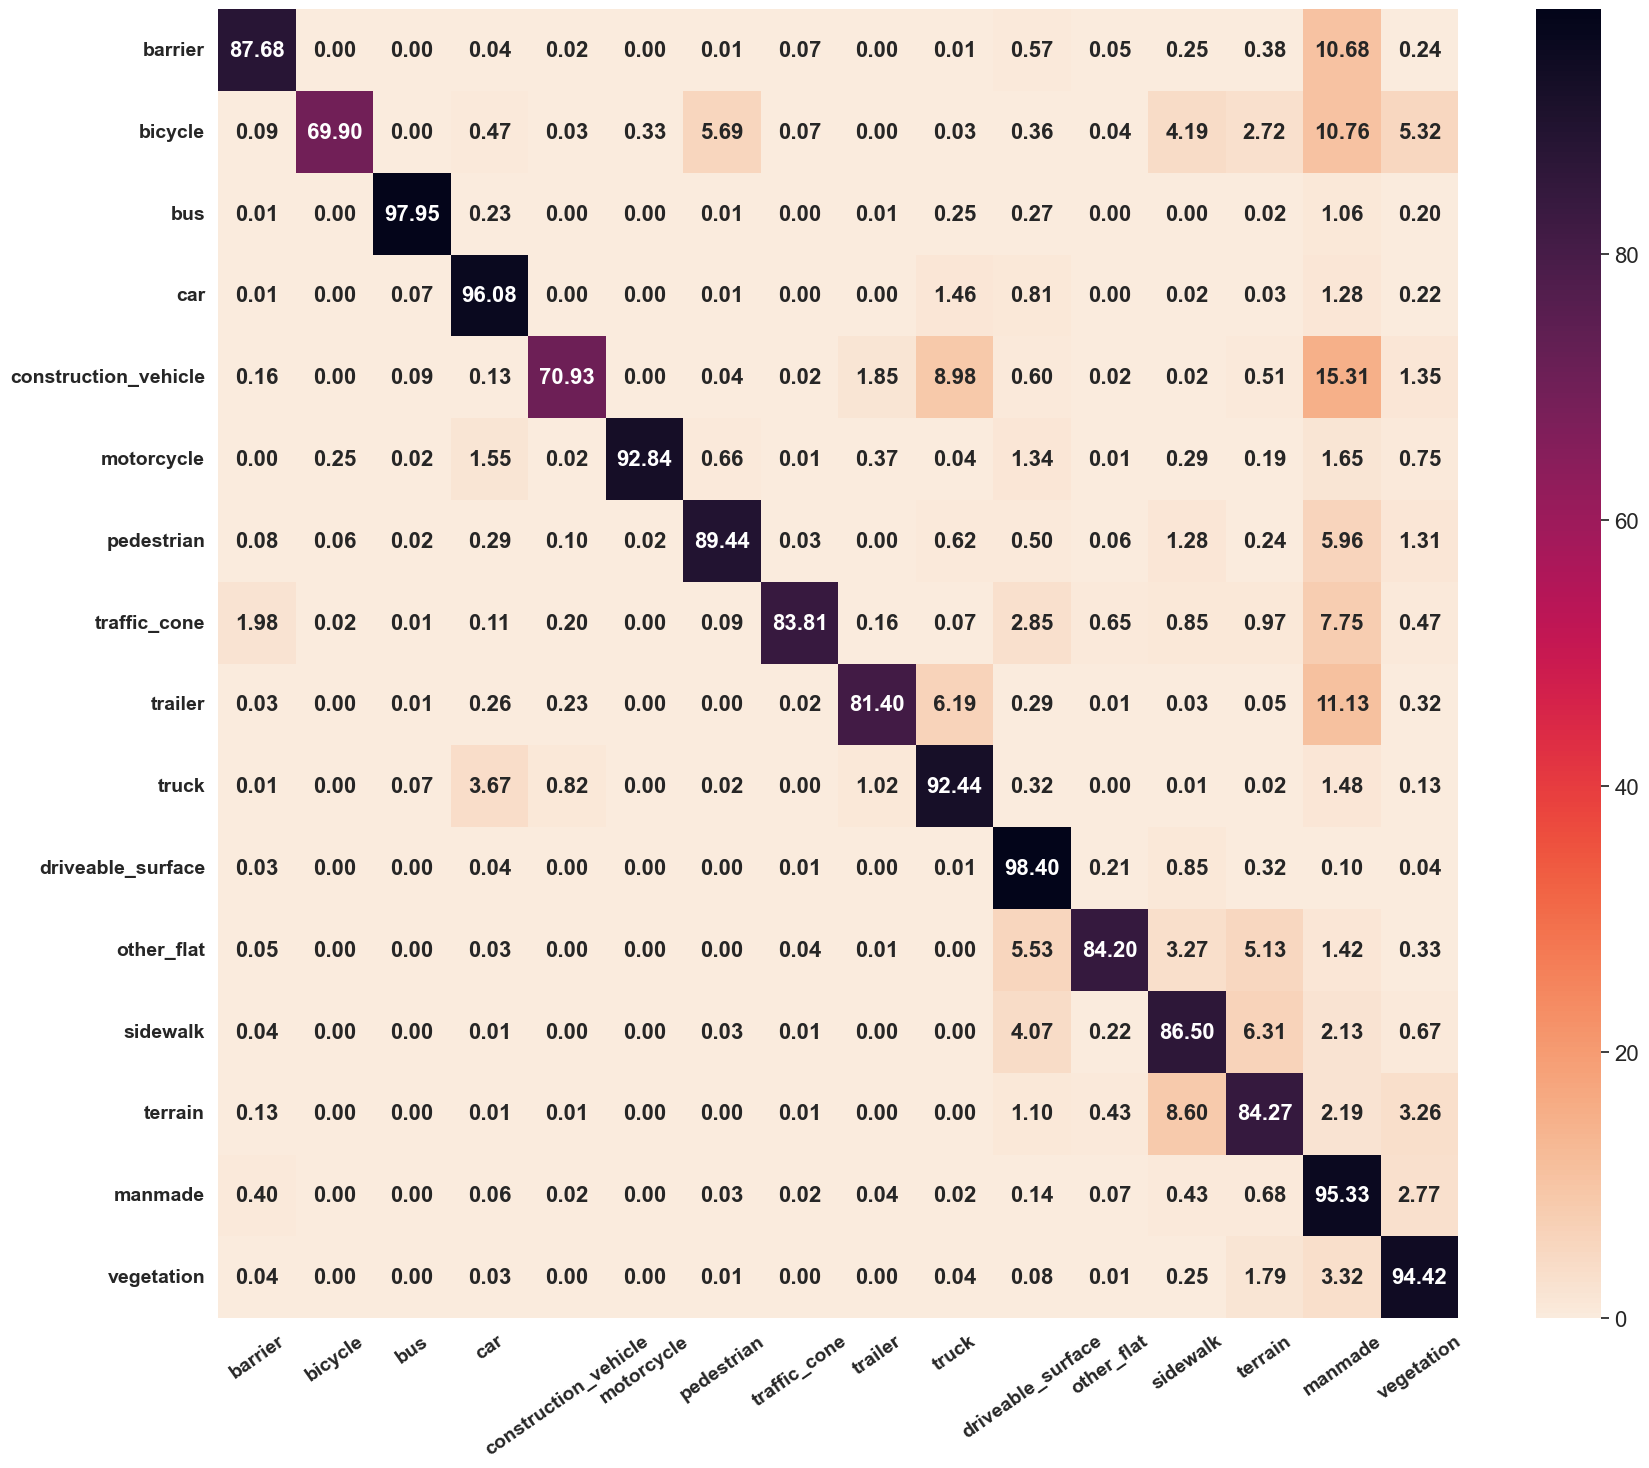

In [112]:
array = (data_nusc / data_nusc.sum(axis=1).reshape(num_classes['nusc'] - 1, 1)) * 100
plot_confusion_matrix(array, class_names_nusc, 'cm_nusc_val')